<a href="https://www.kaggle.com/code/himanshikawade04/credit-card-fraud-detection?scriptVersionId=185757975" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# import the libraries
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/kaggle/input/credit-card-fraud-dataset/creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Know anout the dataset

In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

## Fraud & Not Fraud

In [9]:
Not_fraud =df[df.Class==0]
fraud = df[df.Class==1]
Not_fraud_resample= Not_fraud.sample(492)

In [10]:
Not_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
Not_fraud_resample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
61940,50057.0,-1.893951,1.932864,0.308518,0.227876,-1.250650,-0.735011,-0.601029,1.355283,0.123861,...,0.037360,0.160133,-0.002619,0.425110,0.016068,0.381087,0.189882,0.133392,1.00,0
135714,81371.0,-0.920913,0.342829,0.961566,-1.830365,-0.347308,-0.134021,-0.246346,0.592668,-1.242296,...,0.070817,0.124002,-0.258068,-0.489520,0.289316,-0.355535,0.202084,0.066802,14.00,0
8048,11004.0,1.182042,-0.188466,0.710166,0.157118,-0.702168,-0.328002,-0.569140,0.004652,1.614852,...,-0.031775,0.043680,-0.079653,0.007169,0.186701,1.034069,-0.103181,-0.005293,39.00,0
111388,72212.0,-0.024792,0.328628,0.982878,-1.324043,-1.117423,-0.936813,-1.153562,-2.903940,-1.474010,...,-0.948025,1.172085,-0.098273,0.951877,0.889854,-0.226323,0.061628,0.239286,12.10,0
105529,69573.0,0.846237,-0.714192,1.802784,1.754853,-1.346938,1.185533,-1.135188,0.600736,1.495154,...,0.063618,0.499328,-0.113312,0.256359,0.383188,-0.231137,0.104807,0.039018,82.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254577,156802.0,2.286920,-1.602831,-2.357396,-2.600305,1.170954,3.431215,-1.628998,0.799675,-1.403274,...,-0.169996,-0.073290,0.268137,0.686895,-0.128255,-0.140302,0.028662,-0.057731,15.00,0
240786,150750.0,1.899911,-0.220658,-2.049827,0.146664,0.598839,-0.095749,0.020000,0.006143,0.798163,...,-0.198510,-0.519414,0.080555,-0.083403,-0.029977,-0.103859,-0.025665,-0.020305,74.45,0
223908,143572.0,-0.012765,0.331197,-0.586120,-2.126635,0.422762,0.057354,-0.561652,-2.711393,0.664363,...,-1.255959,0.448713,-0.248886,0.149961,0.886403,0.840669,-0.007754,0.251879,27.83,0
213921,139454.0,1.979883,-0.454800,-0.584971,0.174702,-0.216069,0.438175,-0.745735,0.192633,1.180794,...,0.208815,0.804566,0.072361,0.227652,-0.025249,-0.234919,0.034542,-0.044039,9.99,0


In [12]:
df1=pd.concat([Not_fraud_resample,fraud],axis=0)
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
61940,50057.0,-1.893951,1.932864,0.308518,0.227876,-1.250650,-0.735011,-0.601029,1.355283,0.123861,...,0.037360,0.160133,-0.002619,0.425110,0.016068,0.381087,0.189882,0.133392,1.00,0
135714,81371.0,-0.920913,0.342829,0.961566,-1.830365,-0.347308,-0.134021,-0.246346,0.592668,-1.242296,...,0.070817,0.124002,-0.258068,-0.489520,0.289316,-0.355535,0.202084,0.066802,14.00,0
8048,11004.0,1.182042,-0.188466,0.710166,0.157118,-0.702168,-0.328002,-0.569140,0.004652,1.614852,...,-0.031775,0.043680,-0.079653,0.007169,0.186701,1.034069,-0.103181,-0.005293,39.00,0
111388,72212.0,-0.024792,0.328628,0.982878,-1.324043,-1.117423,-0.936813,-1.153562,-2.903940,-1.474010,...,-0.948025,1.172085,-0.098273,0.951877,0.889854,-0.226323,0.061628,0.239286,12.10,0
105529,69573.0,0.846237,-0.714192,1.802784,1.754853,-1.346938,1.185533,-1.135188,0.600736,1.495154,...,0.063618,0.499328,-0.113312,0.256359,0.383188,-0.231137,0.104807,0.039018,82.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


## Train test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df1.drop(columns='Class',axis=1)
y=df1['Class']


In [15]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
61940,50057.0,-1.893951,1.932864,0.308518,0.227876,-1.250650,-0.735011,-0.601029,1.355283,0.123861,...,-0.053552,0.037360,0.160133,-0.002619,0.425110,0.016068,0.381087,0.189882,0.133392,1.00
135714,81371.0,-0.920913,0.342829,0.961566,-1.830365,-0.347308,-0.134021,-0.246346,0.592668,-1.242296,...,0.125676,0.070817,0.124002,-0.258068,-0.489520,0.289316,-0.355535,0.202084,0.066802,14.00
8048,11004.0,1.182042,-0.188466,0.710166,0.157118,-0.702168,-0.328002,-0.569140,0.004652,1.614852,...,-0.061780,-0.031775,0.043680,-0.079653,0.007169,0.186701,1.034069,-0.103181,-0.005293,39.00
111388,72212.0,-0.024792,0.328628,0.982878,-1.324043,-1.117423,-0.936813,-1.153562,-2.903940,-1.474010,...,0.678590,-0.948025,1.172085,-0.098273,0.951877,0.889854,-0.226323,0.061628,0.239286,12.10
105529,69573.0,0.846237,-0.714192,1.802784,1.754853,-1.346938,1.185533,-1.135188,0.600736,1.495154,...,-0.077576,0.063618,0.499328,-0.113312,0.256359,0.383188,-0.231137,0.104807,0.039018,82.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [16]:
y

61940     0
135714    0
8048      0
111388    0
105529    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
258403,158638.0,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,0.876531,-1.075478,...,3.136338,1.459369,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,296.00
142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.634184,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33
140945,84037.0,-5.966486,4.926258,0.304973,-2.017213,0.229161,-0.322576,2.416447,-1.742998,6.148679,...,4.311562,-1.590349,-0.552313,-0.110064,0.105648,0.765985,-0.203556,0.498820,-1.308231,9.84
213116,139117.0,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,...,2.109403,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,8.30
9509,14152.0,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,...,1.434240,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40202,40134.0,0.941799,-0.573896,1.010103,1.370380,-0.773684,1.017930,-0.784125,0.484448,1.166325,...,-0.100681,0.131561,0.578453,-0.249736,-0.271428,0.610784,-0.123647,0.069811,0.022292,79.00
234120,147833.0,-0.428239,-0.878213,1.566522,-2.471574,-0.020627,-0.922500,0.121320,-0.671146,-1.972897,...,-0.143733,-0.270266,-0.035516,-0.405685,-0.001175,0.683429,-0.086680,-0.497135,-0.470282,25.18
189587,128471.0,0.909124,1.337658,-4.484728,3.245358,-0.417809,-0.762119,-2.506349,0.694164,-0.467556,...,0.445573,0.586829,0.594078,-0.252120,0.325439,0.562766,-0.256278,0.652674,0.319879,67.90
3566,3048.0,-0.302521,0.447474,-0.495757,-3.214799,2.705041,2.762440,0.593847,0.556451,0.697720,...,0.156089,0.007343,0.250886,-0.331600,1.009952,0.233730,-0.824471,0.241305,-0.020359,1.00


In [19]:
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (787, 30) and size 23610
X_test shape (197, 30) and size 5910
y_train shape (787,) and size 787
y_test shape (197,) and size 197


## Model Fitting

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred=lr.predict(X_test)

In [23]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [24]:
from sklearn.metrics import accuracy_score


In [25]:
accuracy=accuracy_score(y_test,y_pred)
print(f"the accuracy of the model is {accuracy }")

the accuracy of the model is 0.9289340101522843


In [26]:
lr.score(X_test,y_test)

0.9289340101522843

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

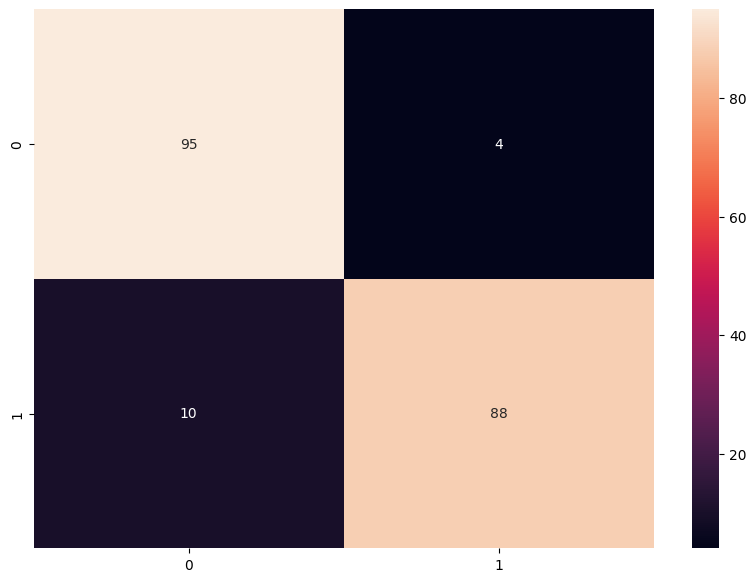

In [28]:

cm=confusion_matrix(y_test,y_pred,labels=lr.classes_)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,xticklabels=lr.classes_,yticklabels=lr.classes_)